<a href="https://colab.research.google.com/github/Hanifuniverse/tb-kelompok-pcd/blob/main/Deteksi_pLAT_Nomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

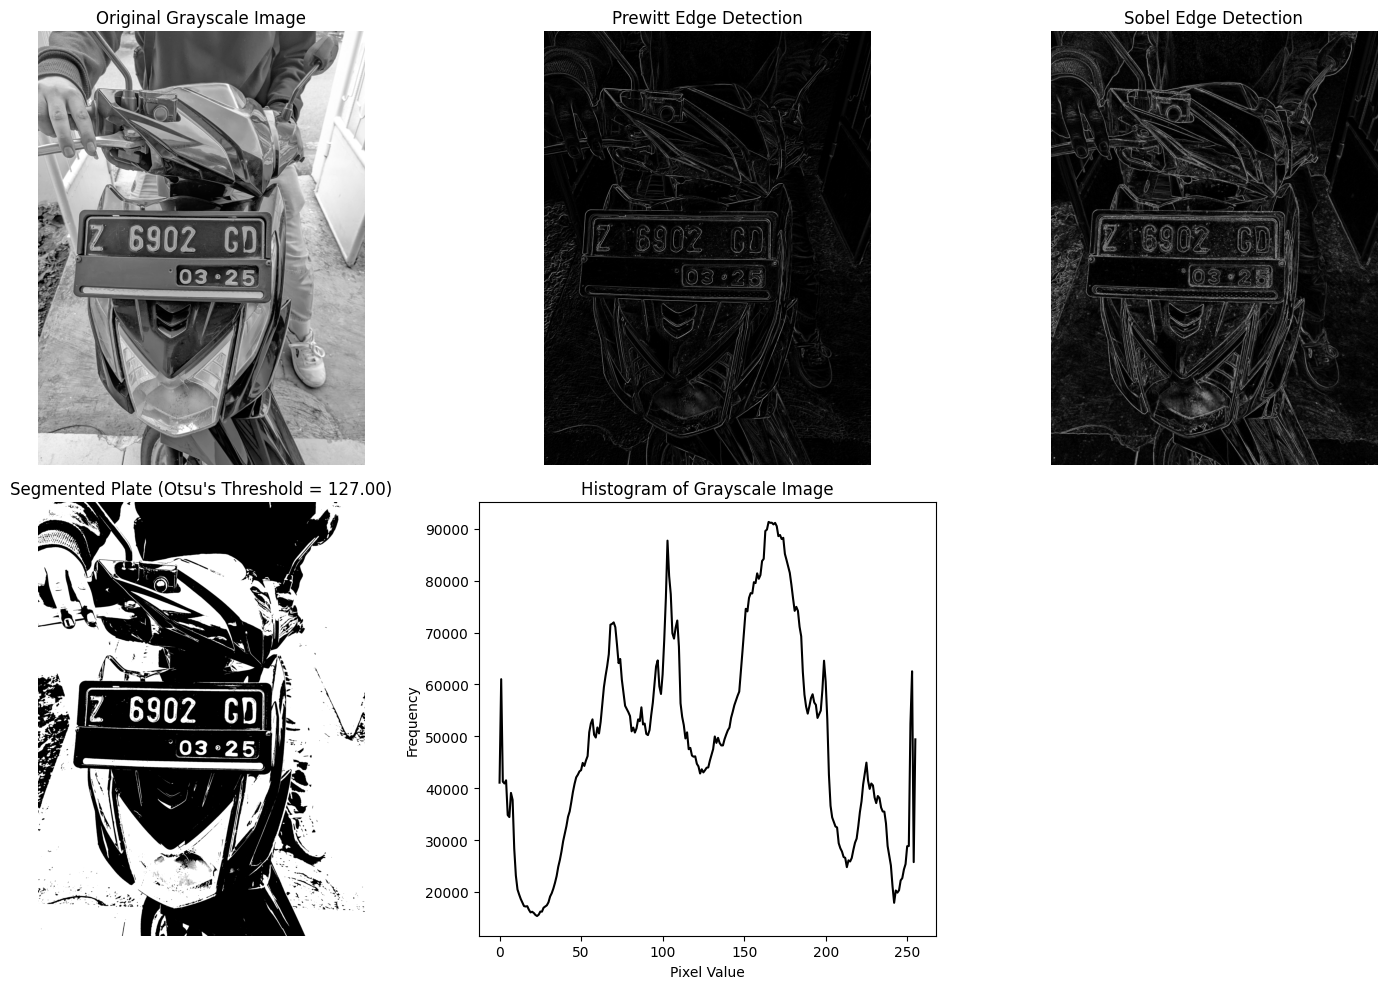

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/plat_nomor.jpg"  # Replace <path_to_image> with the actual image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Prewitt Edge Detection
prewitt_x = cv2.filter2D(gray_image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(gray_image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_edges = cv2.bitwise_or(prewitt_x, prewitt_y)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

# Image Segmentation using Thresholding
_, segmented = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Histogram Calculation
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Display Results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Segmented Plate (Thresholding)")
plt.imshow(segmented, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Histogram of Grayscale Image")
plt.plot(histogram, color="black")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Penjelasan Program Edge Detection dan Segmentasi Plat Nomor

## 1. Load Gambar
Gambar diambil dari path yang diberikan menggunakan fungsi `cv2.imread`. Format gambar kemudian diubah menjadi grayscale menggunakan `cv2.cvtColor` untuk mempermudah pengolahan citra.

## 2. Deteksi Tepi dengan Prewitt
- **Prewitt Filter** digunakan untuk mendeteksi tepi gambar pada dua arah:
  - Horizontal (`prewitt_x`) dengan kernel:
    ```
    [[ 1,  0, -1],
     [ 1,  0, -1],
     [ 1,  0, -1]]
    ```
  - Vertikal (`prewitt_y`) dengan kernel:
    ```
    [[ 1,  1,  1],
     [ 0,  0,  0],
     [-1, -1, -1]]
    ```
- Hasil dari kedua arah digabungkan menggunakan `cv2.bitwise_or` untuk menghasilkan deteksi tepi penuh.

## 3. Deteksi Tepi dengan Sobel
- **Sobel Filter** menghitung gradien intensitas citra untuk mendeteksi tepi:
  - Gradien horizontal dihitung menggunakan `cv2.Sobel` dengan parameter `(1, 0)`.
  - Gradien vertikal dihitung menggunakan `cv2.Sobel` dengan parameter `(0, 1)`.
- Magnitudo gradien dihitung dengan `cv2.magnitude` untuk menghasilkan peta tepi yang lebih akurat.

## 4. Segmentasi Citra dengan Thresholding Otsu
- Metode Otsu digunakan untuk membagi citra menjadi dua kategori (foreground dan background) dengan menghitung nilai threshold optimal.
- Fungsi `cv2.threshold` dengan parameter `cv2.THRESH_BINARY + cv2.THRESH_OTSU` menghasilkan:
  - Gambar biner (tersegmentasi).
  - Nilai threshold optimal (`otsu_threshold`).

## 5. Perhitungan Histogram
- Histogram menggambarkan distribusi frekuensi intensitas piksel pada gambar grayscale.
- Fungsi `cv2.calcHist` digunakan untuk menghitung histogram dari citra grayscale.

## 6. Visualisasi Hasil
Hasil dari berbagai langkah di atas ditampilkan menggunakan pustaka `matplotlib`:
- **Gambar Asli**: Gambar grayscale.
- **Prewitt Edge Detection**: Peta tepi berdasarkan metode Prewitt.
- **Sobel Edge Detection**: Peta tepi berdasarkan metode Sobel.
- **Segmentasi dengan Thresholding Otsu**: Gambar biner hasil segmentasi.
- **Histogram**: Distribusi intensitas piksel pada gambar grayscale.

## Tujuan Program
- **Deteksi Tepi**: Untuk mengidentifikasi karakteristik tepi pada plat nomor kendaraan.
- **Segmentasi**: Memisahkan teks pada plat nomor dari latar belakang.
- **Histogram**: Memberikan wawasan tentang distribusi intensitas piksel.

## Catatan
Ganti `<path_to_image>` pada kode dengan path file gambar Anda sebelum menjalankan program.

# Penjelasan Hasil Image Processing

## 1. Original Grayscale Image (Gambar Asli dalam Grayscale)
- Gambar asli diubah menjadi format grayscale.
- Grayscale hanya memiliki intensitas warna hitam, putih, dan abu-abu di antaranya.
- Proses ini mempermudah analisis citra karena mengurangi dimensi warna.

## 2. Prewitt Edge Detection
- Gambar ini menunjukkan hasil deteksi tepi menggunakan metode **Prewitt**.
- Prewitt adalah operator deteksi tepi berbasis gradien yang menghitung perubahan intensitas piksel di sekitar tepi.
- Hasilnya menonjolkan tepi objek seperti pelat nomor dan bagian motor.

## 3. Sobel Edge Detection
- Gambar ini menunjukkan hasil deteksi tepi menggunakan metode **Sobel**.
- Sobel adalah operator gradien yang serupa dengan Prewitt tetapi lebih sensitif terhadap perubahan intensitas.
- Metode ini memberikan bobot lebih besar pada piksel di sekitar pusat sehingga hasilnya lebih tajam dibandingkan Prewitt.

## 4. Segmented Plate (Otsu's Threshold = 127.00)
- Hasil segmentasi citra menggunakan metode thresholding **Otsu**.
- Threshold Otsu secara otomatis menentukan ambang intensitas piksel untuk memisahkan objek (pelat nomor) dari latar belakang.
- Pelat nomor berhasil diekstraksi, dengan piksel berwarna hitam-putih yang menunjukkan objek dan latar belakangnya.

## 5. Histogram of Grayscale Image
- Histogram menggambarkan distribusi intensitas piksel pada citra grayscale.
- **Sumbu x**: Menunjukkan nilai intensitas piksel (0 untuk hitam, 255 untuk putih).
- **Sumbu y**: Menunjukkan frekuensi setiap nilai intensitas.
- Puncak pada histogram menunjukkan intensitas yang dominan pada gambar (misalnya, bagian terang atau gelap).

## Kesimpulan
- Proses ini bertujuan untuk mengekstraksi informasi penting dari citra, seperti pelat nomor kendaraan.
- **Deteksi tepi** (Prewitt dan Sobel) digunakan untuk menyoroti tepi objek pada citra.
- **Segmentasi** dengan threshold Otsu digunakan untuk memisahkan objek utama dari latar belakang.
- **Histogram** memberikan analisis statistik distribusi intensitas untuk memahami karakteristik gambar.

Proses ini dapat digunakan untuk aplikasi seperti pengenalan karakter pelat nomor menggunakan OCR (Optical Character Recognition).
